# Analysis of the performance of phase balancing using switchers

## 1. Importing the necessary libraries

In [1]:
import win32com.client
dssObj = win32com.client.Dispatch("OpenDSSEngine.DSS")
dssText = dssObj.Text
dssCircuit = dssObj.ActiveCircuit
dssSolution = dssCircuit.Solution
dssElem = dssCircuit.ActiveCktElement
dssBus = dssCircuit.ActiveBus
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import datetime as dt
import math
import cmath
import numpy as np

## 2. Loading the results from the simulations with and without phase balancing

In [5]:
result1 = pd.read_csv("C:\\Users\\lazhe\\OneDrive\\Thesis\\OpenDSS\\OpenDSS_simulations\\1_Yearly_simulation_with_lines_losses\\result(Yearly_simulation_2019).csv") #Loading the results without phase balancing from the csv file 
result2 = pd.read_csv("C:\\Users\\lazhe\\OneDrive\\Thesis\\OpenDSS\\OpenDSS_simulations\\1_Yearly_simulation_with_lines_losses\\result(Yearly_simulation_2019_with_phase_balancing).csv") #Loading the results with phase balancing from the csv file 

## 3. Plotting some results in different periods

### 3.1 One day results

Set the begin and the end simulation point to plot the desired day of the year. We showed the results for 20/02/2019, but you can change to whatever day you want.

In [6]:
dates = []
d0 = dt.datetime(2019, 1, 1)
begin = input("From (year/month/day/hour/minute):")
end = input("To (year/month/day/hour/minute):")
begindt = dt.datetime.strptime(begin, "%Y/%m/%d/%H/%M")
enddt = dt.datetime.strptime(end, "%Y/%m/%d/%H/%M")
begin_delta = begindt - d0
end_delta = enddt - d0
b = int(begin_delta.total_seconds()/60/10)
e = int(end_delta.total_seconds()/60/10)
dates = [begindt + dt.timedelta(minutes = 10 * i) for i in range(e - b)]

From (year/month/day/hour/minute):2019/04/01/00/00
To (year/month/day/hour/minute):2019/04/02/00/00


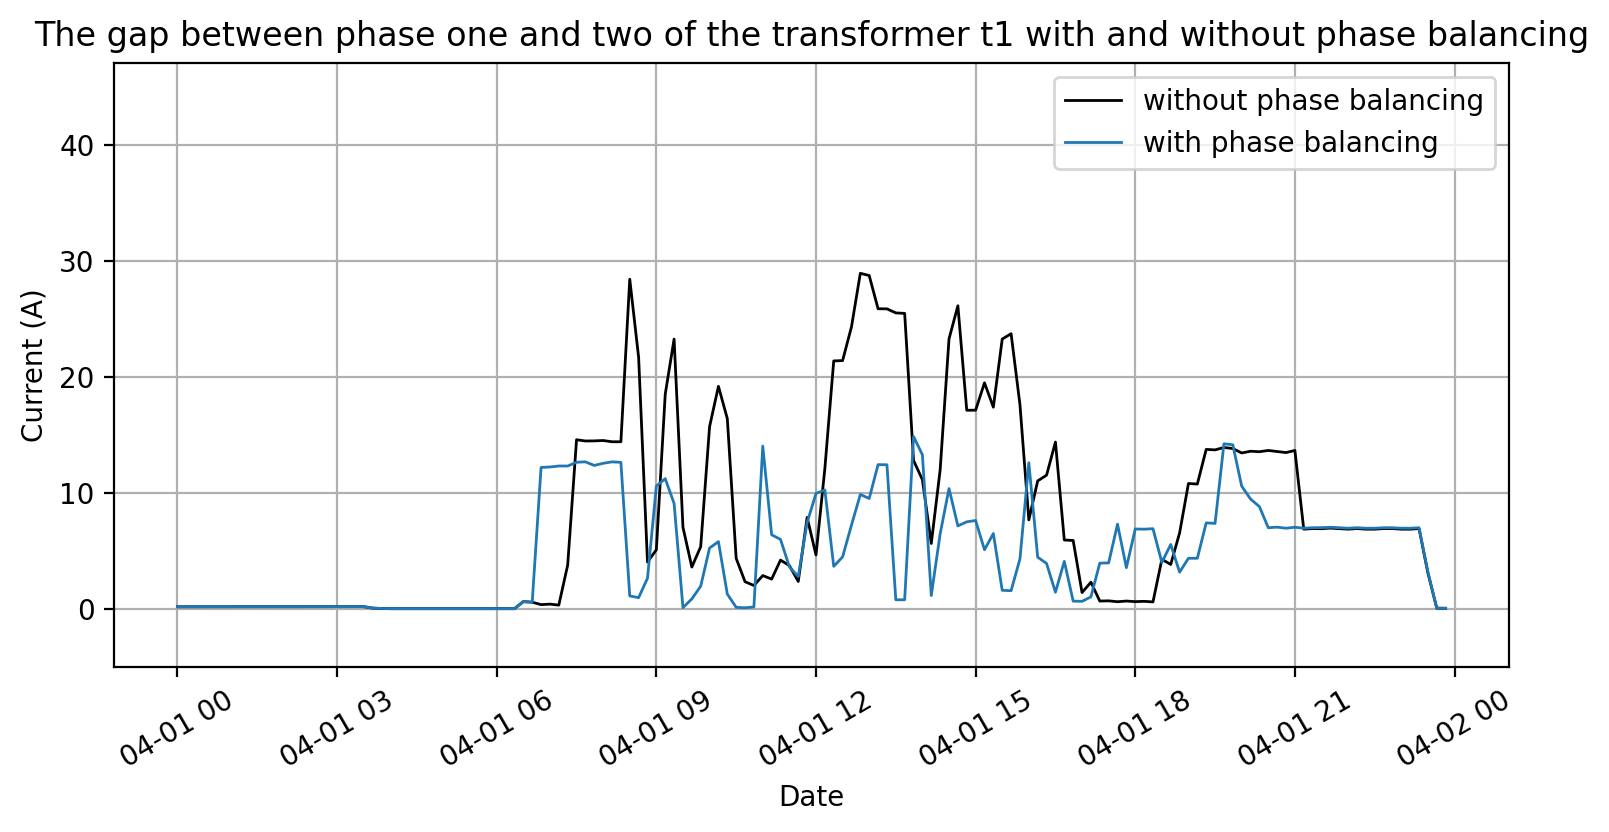

In [7]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase one and two of the transformer t1 with and without phase balancing")
y1 = abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P1 (kW)"][b:e] - result2["P2 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=1, label = "without phase balancing")
plt.plot(dates, y2, linewidth=1, label = "with phase balancing")
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

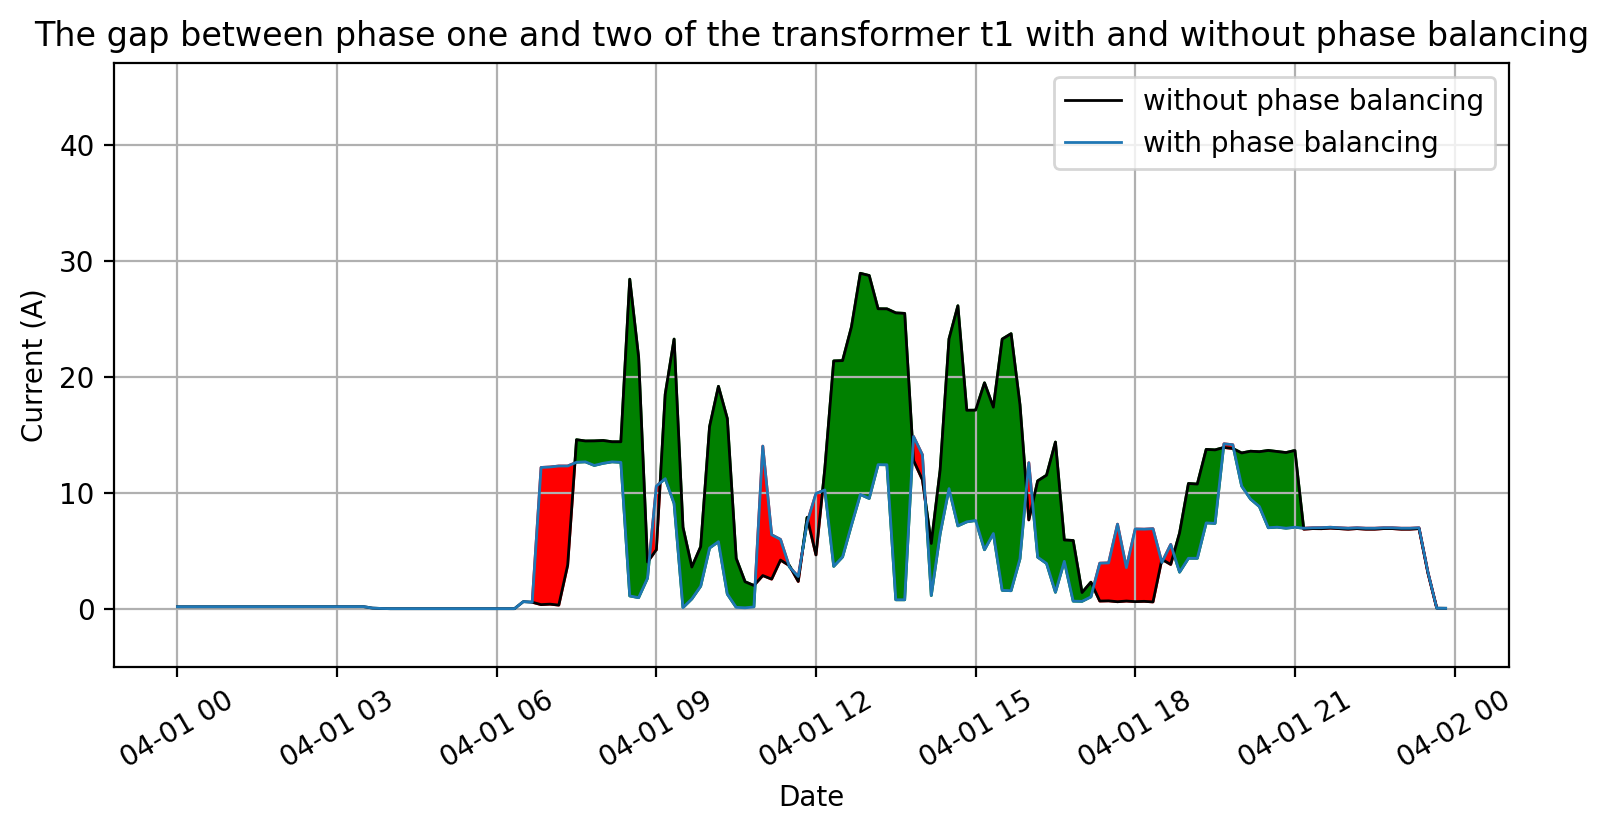

In [8]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase one and two of the transformer t1 with and without phase balancing")
y1 = abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P1 (kW)"][b:e] - result2["P2 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=1, label = "without phase balancing")
plt.plot(dates, y2, linewidth=1, label = "with phase balancing")
plt.fill_between(dates, y1, y2, where = y1 > y2 ,color='green' ,interpolate=True)
plt.fill_between(dates, y2, y1, where = y2 > y1 ,color='red' ,interpolate=True)
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

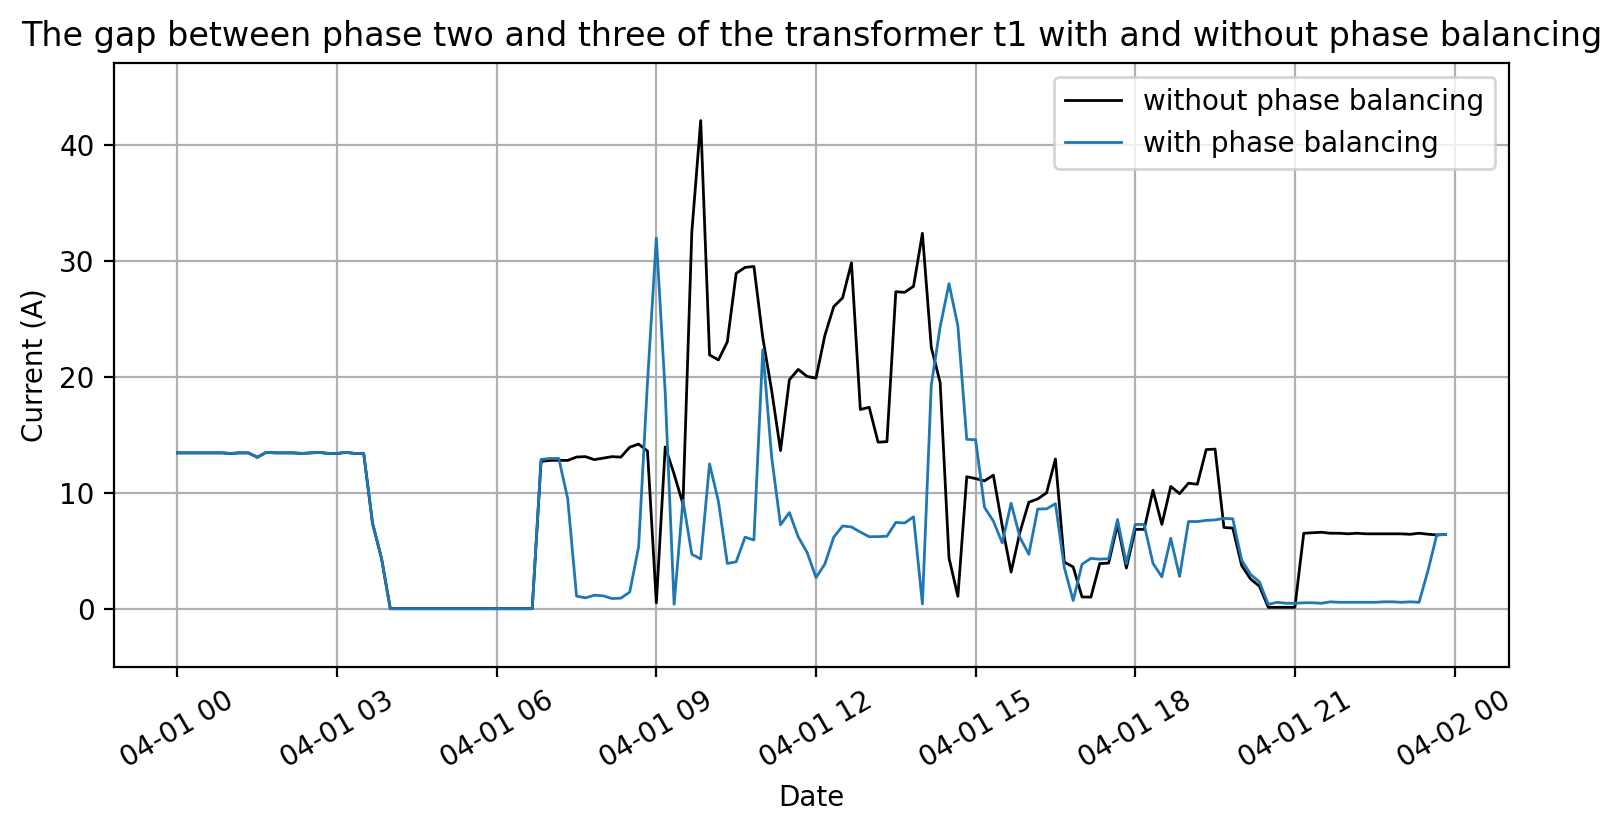

In [9]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase two and three of the transformer t1 with and without phase balancing")
y1 = abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P2 (kW)"][b:e] - result2["P3 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=1, label = "without phase balancing")
plt.plot(dates, y2, linewidth=1, label = "with phase balancing")
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

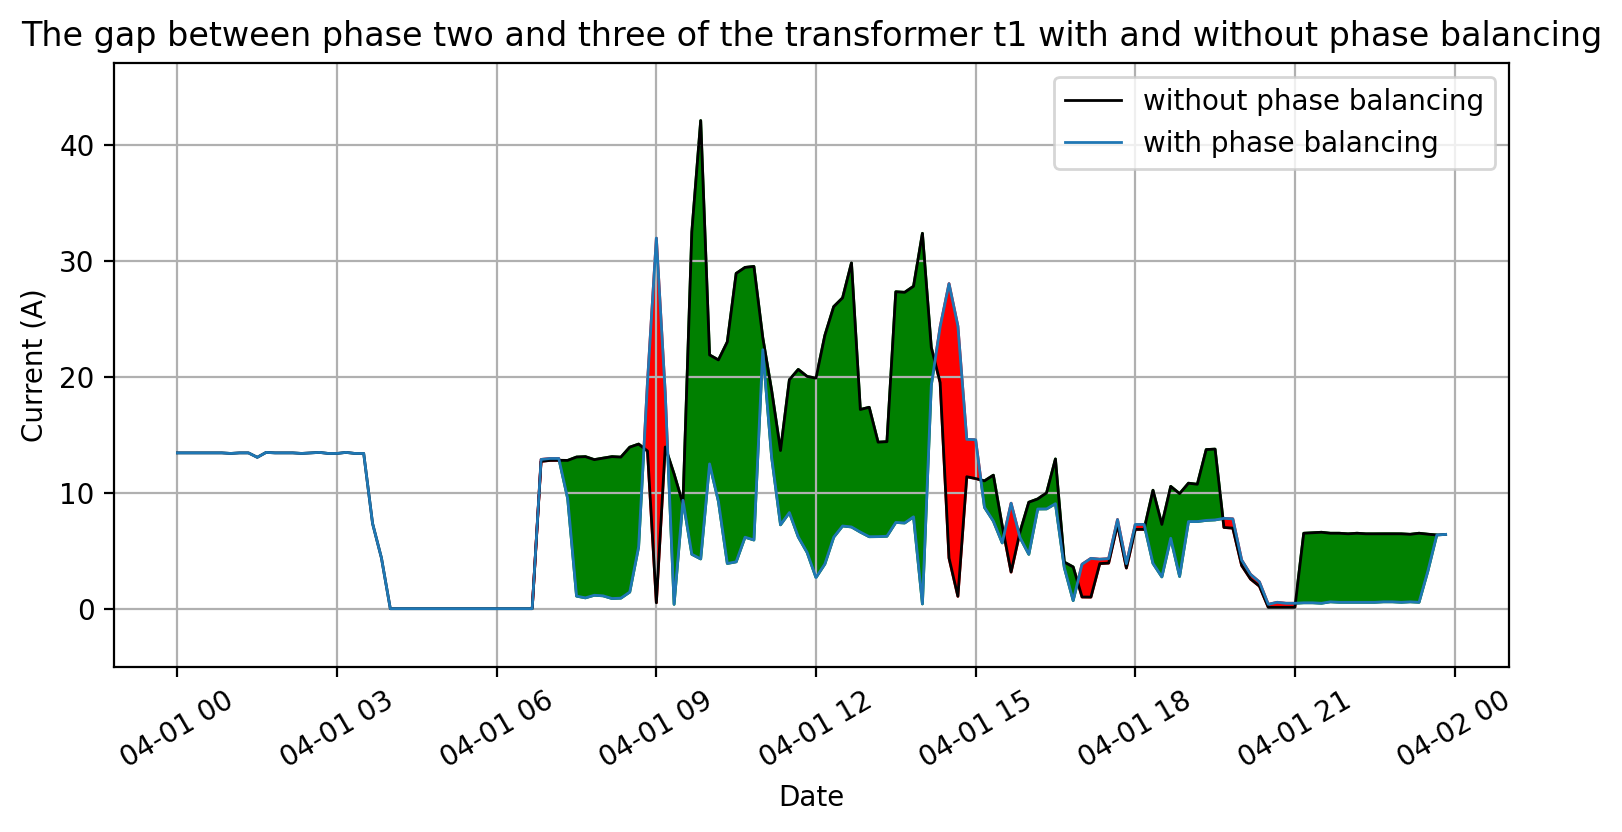

In [10]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase two and three of the transformer t1 with and without phase balancing")
y1 = abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P2 (kW)"][b:e] - result2["P3 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=1, label = "without phase balancing")
plt.plot(dates, y2, linewidth=1, label = "with phase balancing")
plt.fill_between(dates, y1, y2, where = y1 > y2 ,color='green' ,interpolate=True)
plt.fill_between(dates, y2, y1, where = y2 > y1 ,color='red' ,interpolate=True)
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

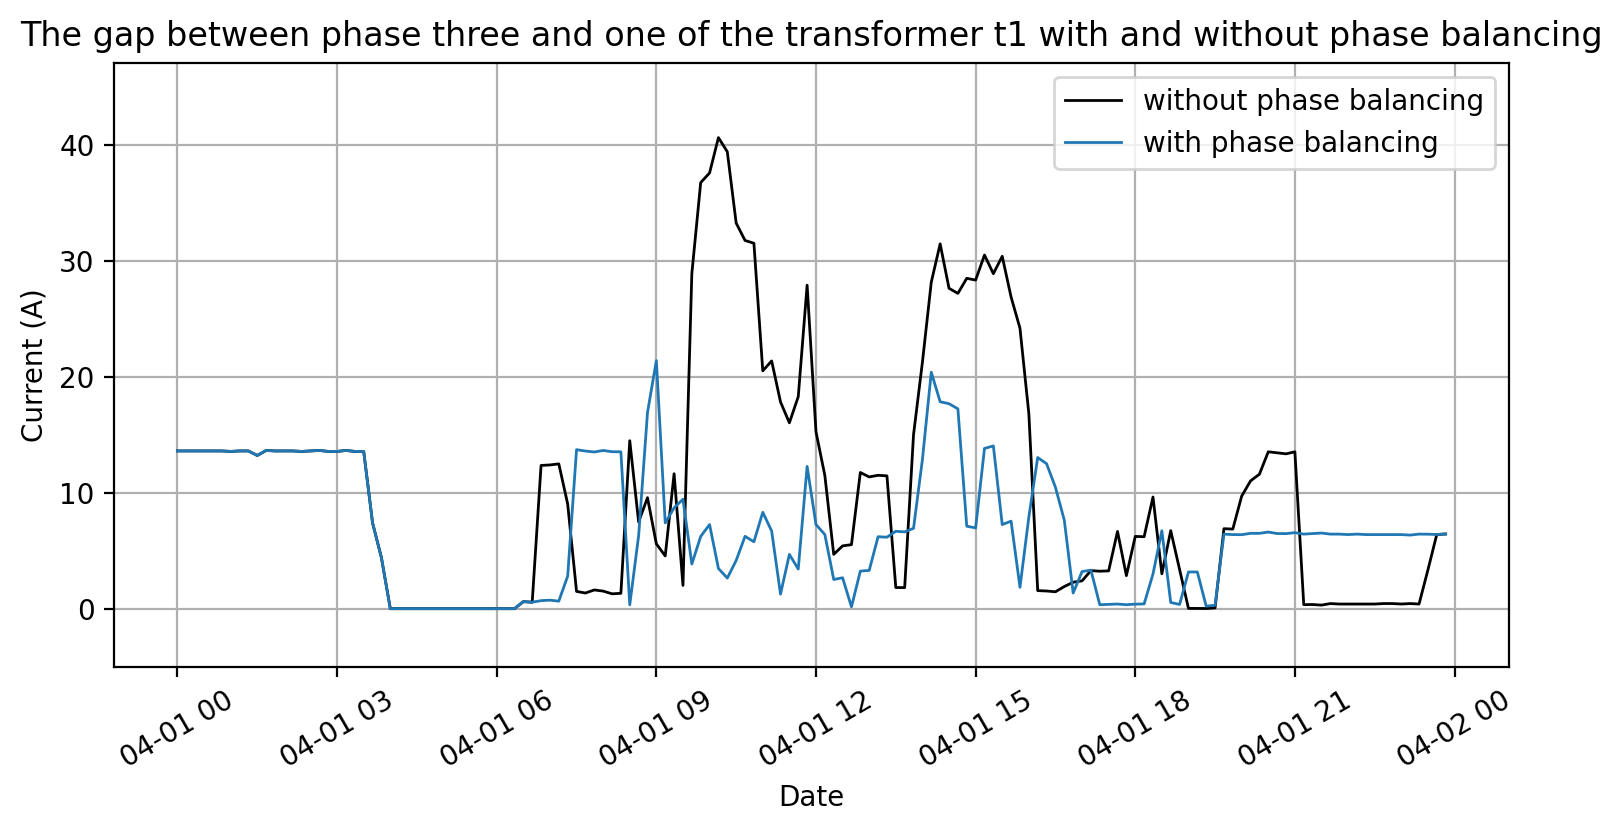

In [11]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase three and one of the transformer t1 with and without phase balancing")
y1 = abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P3 (kW)"][b:e] - result2["P1 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=1, label = "without phase balancing")
plt.plot(dates, y2, linewidth=1, label = "with phase balancing")
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

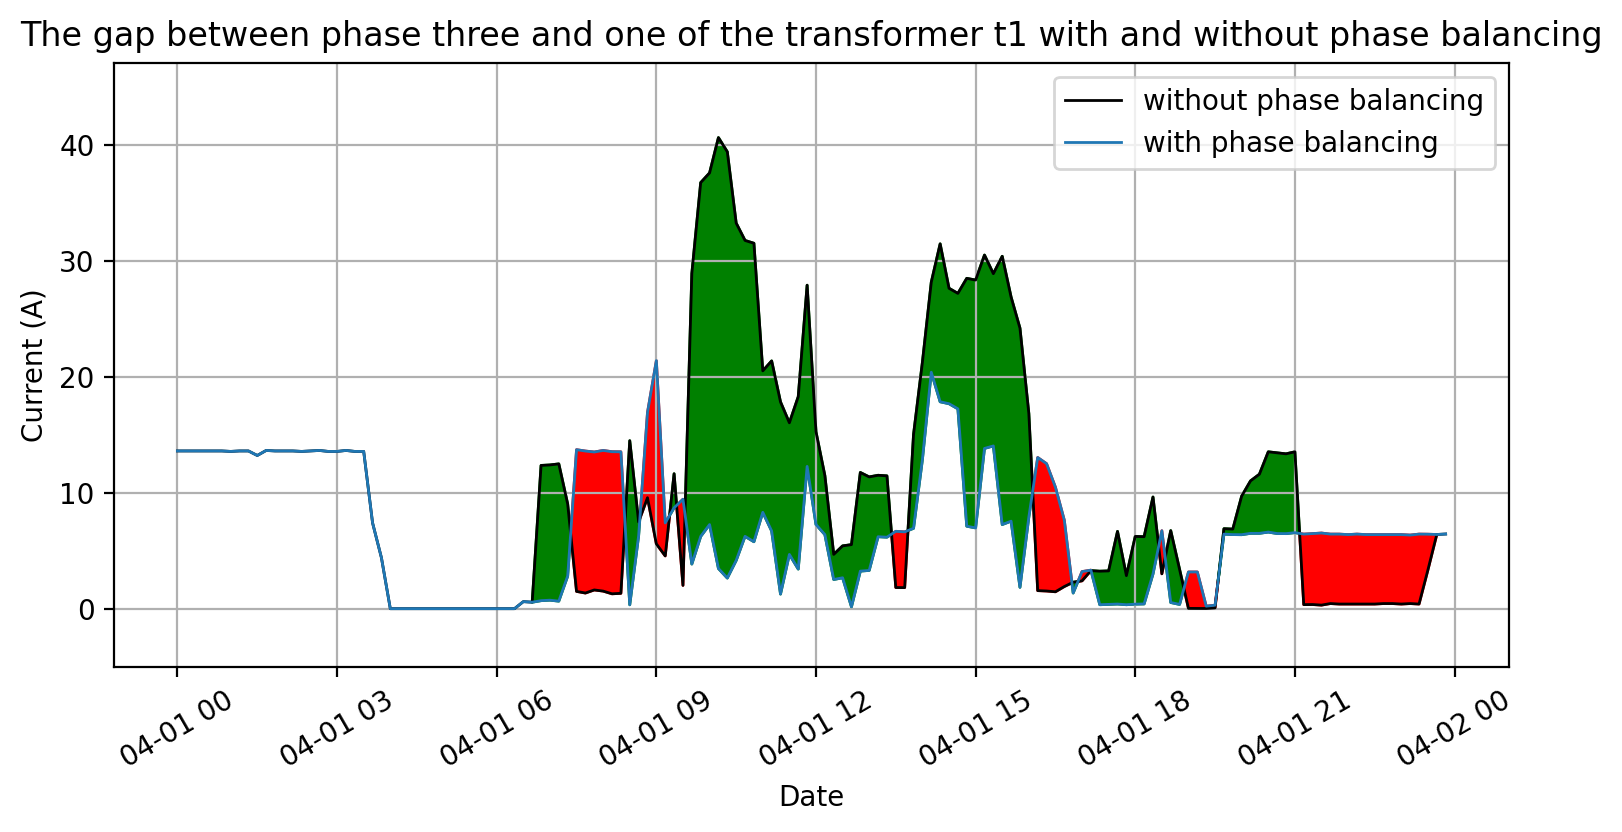

In [12]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase three and one of the transformer t1 with and without phase balancing")
y1 = abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P3 (kW)"][b:e] - result2["P1 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=1, label = "without phase balancing")
plt.plot(dates, y2, linewidth=1, label = "with phase balancing")
plt.fill_between(dates, y1, y2, where = y1 > y2 ,color='green' ,interpolate=True)
plt.fill_between(dates, y2, y1, where = y2 > y1 ,color='red' ,interpolate=True)
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

### 3.2 One week results

Set the begin and the end simulation point to plot the desired week of the year. We showed the results for the week from 03/02/2019 to 09/02/2019, but you can change to whatever day you want.

In [16]:
dates = []
d0 = dt.datetime(2019, 1, 1)
begin = input("From (year/month/day/hour/minute):")
end = input("To (year/month/day/hour/minute):")
begindt = dt.datetime.strptime(begin, "%Y/%m/%d/%H/%M")
enddt = dt.datetime.strptime(end, "%Y/%m/%d/%H/%M")
begin_delta = begindt - d0
end_delta = enddt - d0
b = int(begin_delta.total_seconds()/60/10)
e = int(end_delta.total_seconds()/60/10)
dates = [begindt + dt.timedelta(minutes = 10 * i) for i in range(e - b)]

From (year/month/day/hour/minute):2019/02/03/00/00
To (year/month/day/hour/minute):2019/02/09/00/00


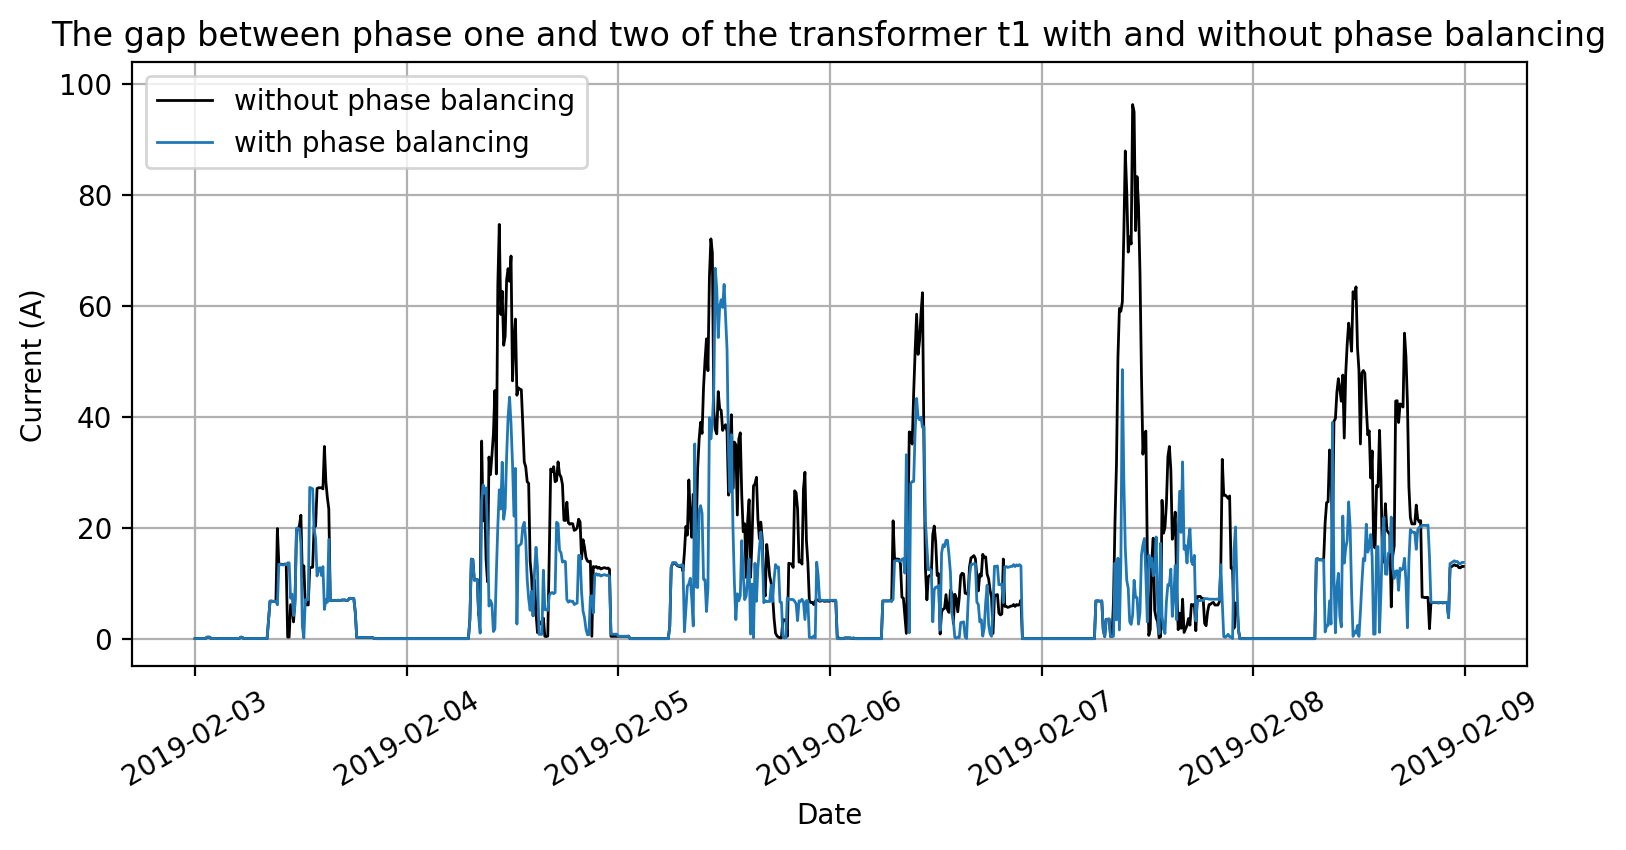

In [17]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase one and two of the transformer t1 with and without phase balancing")
y1 = abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P1 (kW)"][b:e] - result2["P2 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=1, label = "without phase balancing")
plt.plot(dates, y2, linewidth=1, label = "with phase balancing")
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

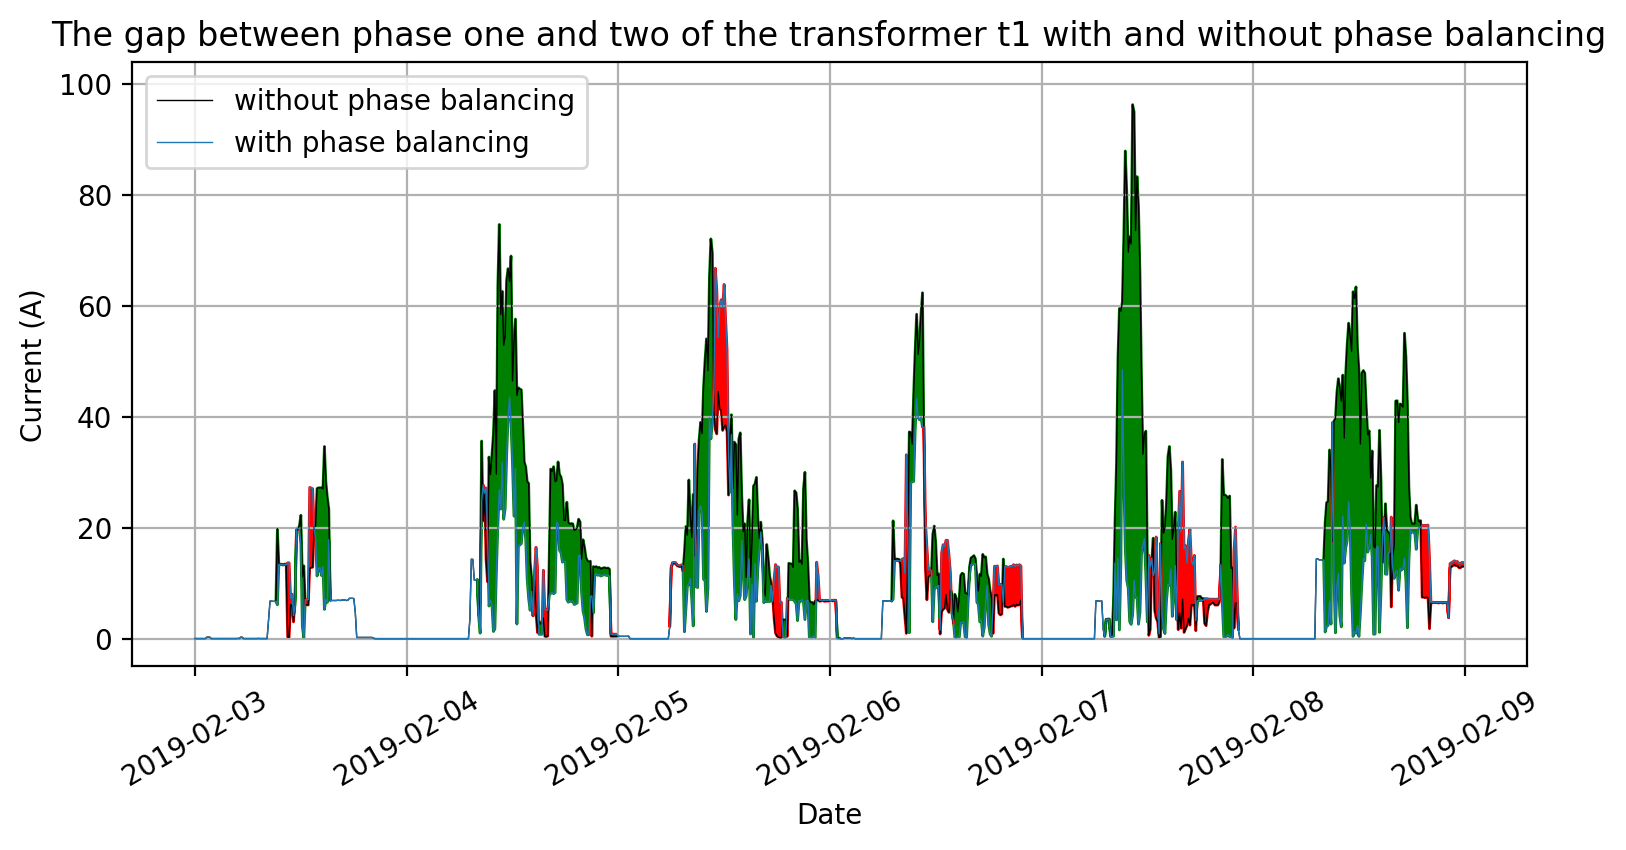

In [18]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase one and two of the transformer t1 with and without phase balancing")
y1 = abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P1 (kW)"][b:e] - result2["P2 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=0.5, label = "without phase balancing")
plt.plot(dates, y2, linewidth=0.5, label = "with phase balancing")
plt.fill_between(dates, y1, y2, where = y1 > y2 ,color='green' ,interpolate=True)
plt.fill_between(dates, y2, y1, where = y2 > y1 ,color='red' ,interpolate=True)
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

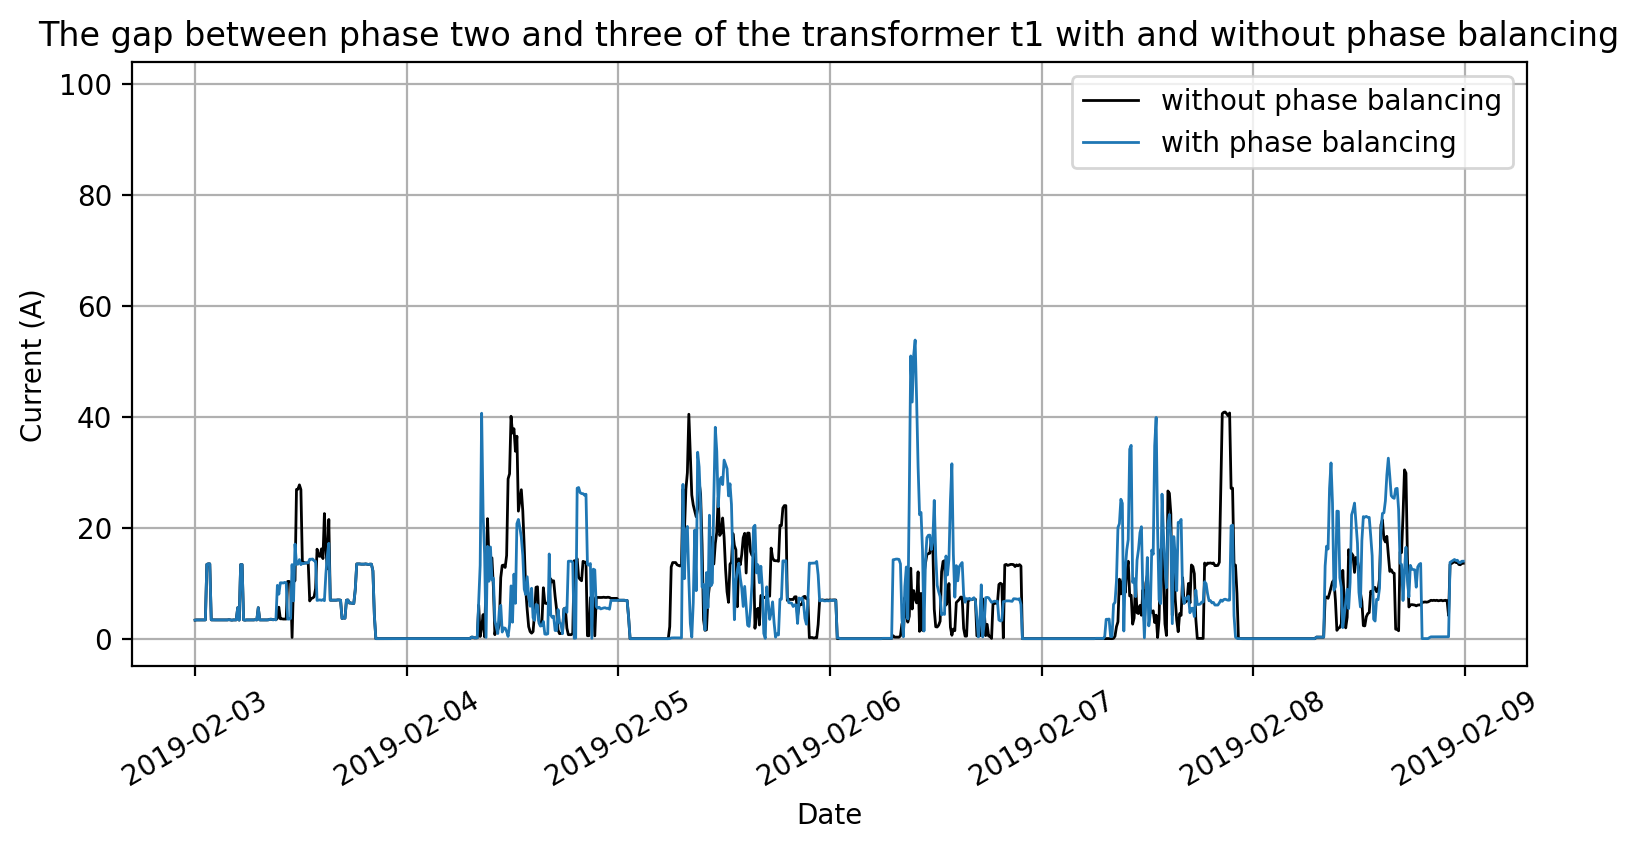

In [19]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase two and three of the transformer t1 with and without phase balancing")
y1 = abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P2 (kW)"][b:e] - result2["P3 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=1, label = "without phase balancing")
plt.plot(dates, y2, linewidth=1, label = "with phase balancing")
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

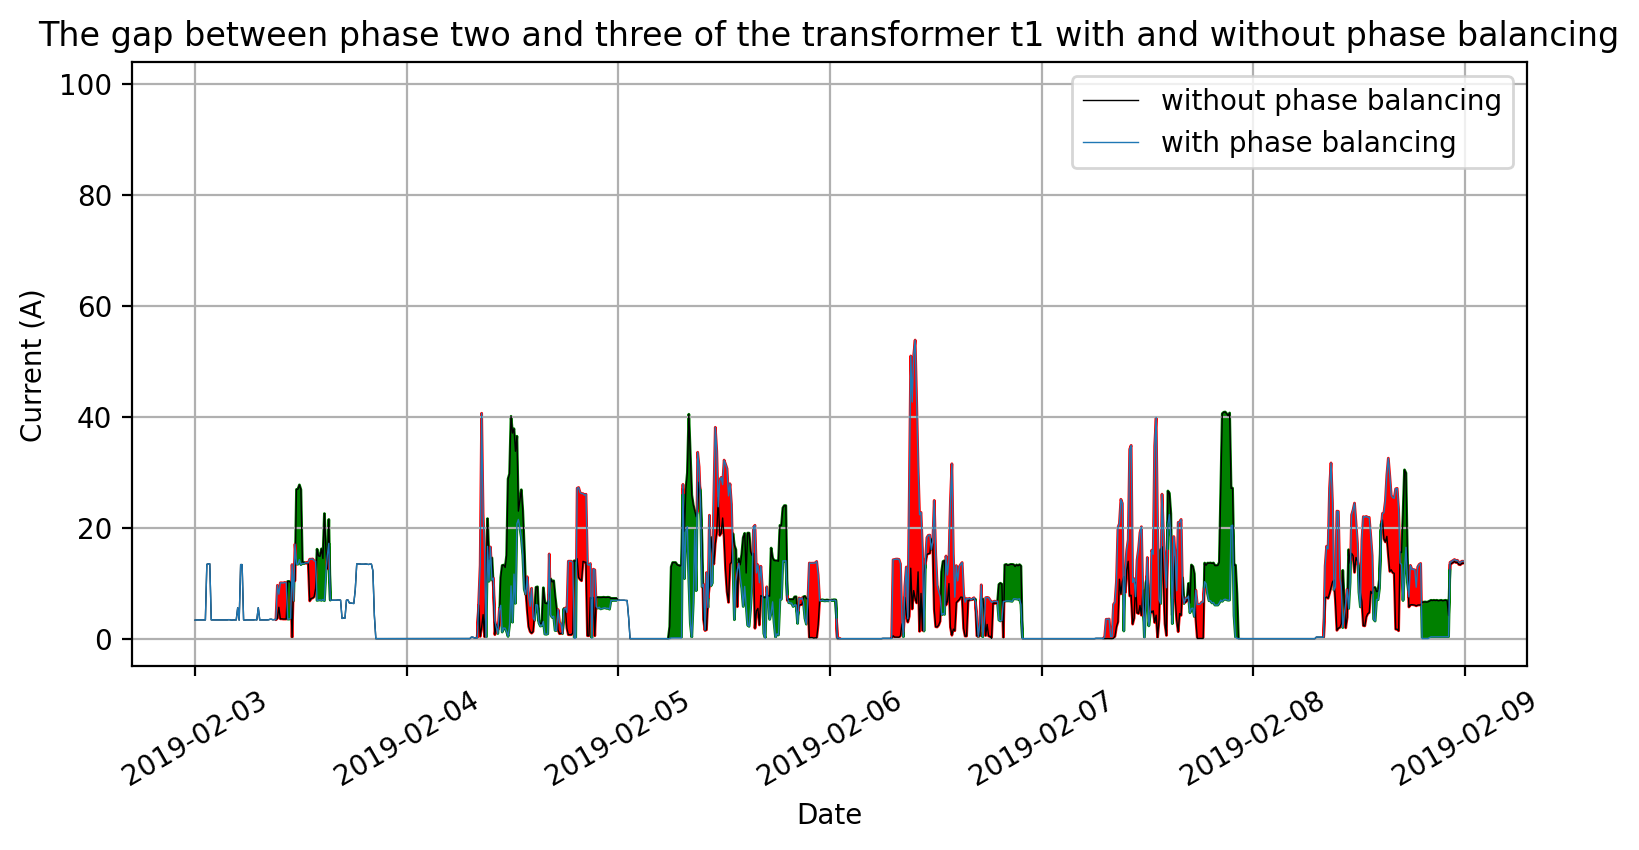

In [20]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase two and three of the transformer t1 with and without phase balancing")
y1 = abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P2 (kW)"][b:e] - result2["P3 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=0.5, label = "without phase balancing")
plt.plot(dates, y2, linewidth=0.5, label = "with phase balancing")
plt.fill_between(dates, y1, y2, where = y1 > y2 ,color='green' ,interpolate=True)
plt.fill_between(dates, y2, y1, where = y2 > y1 ,color='red' ,interpolate=True)
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

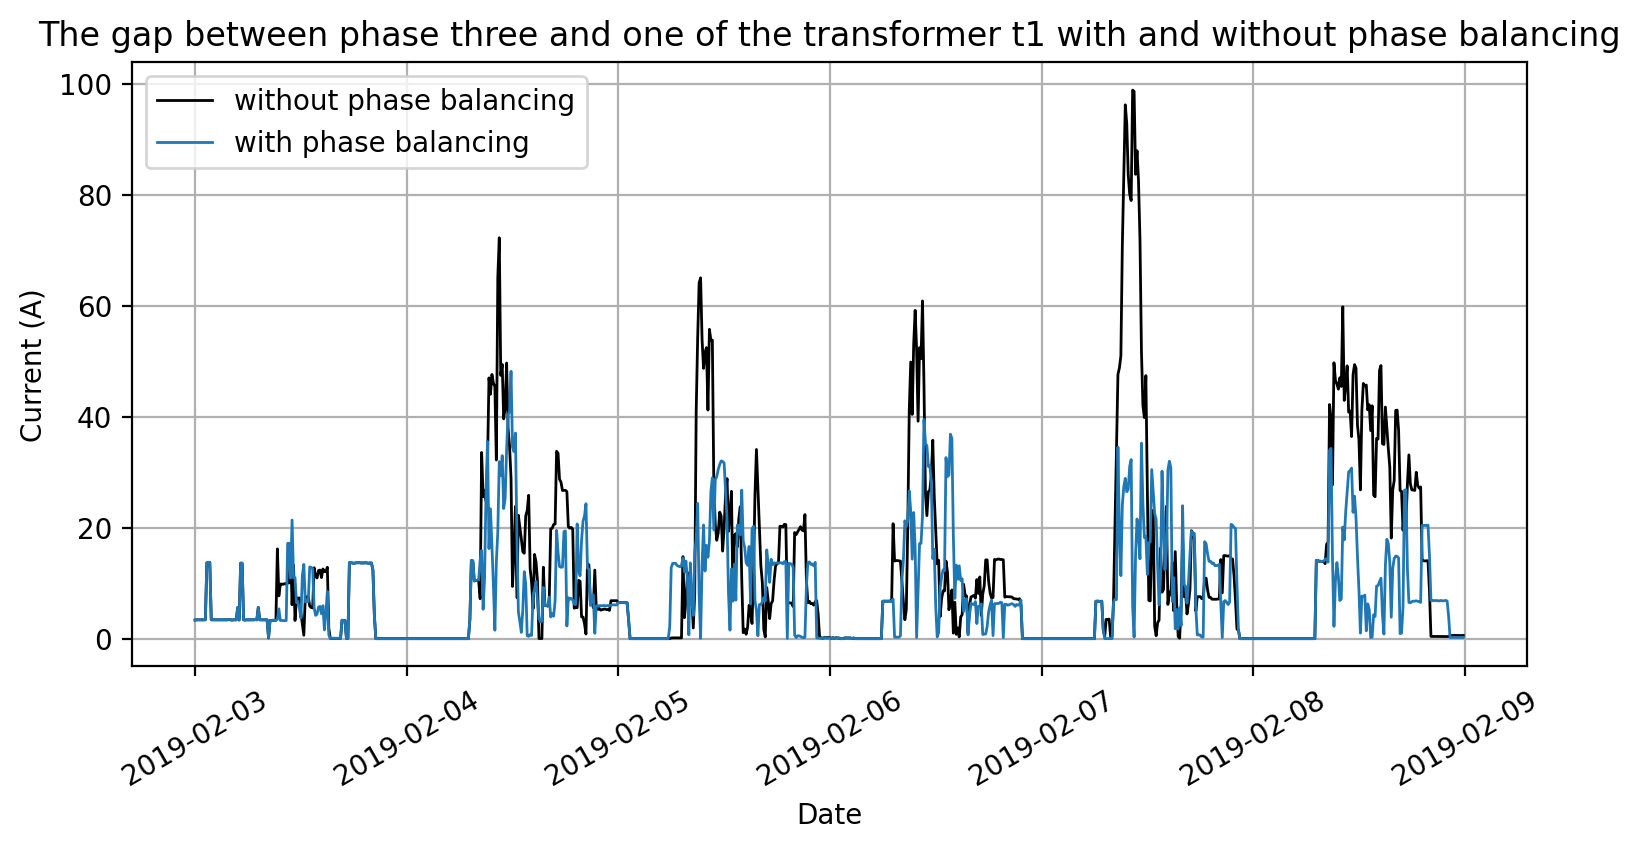

In [21]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase three and one of the transformer t1 with and without phase balancing")
y1 = abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P3 (kW)"][b:e] - result2["P1 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=1, label = "without phase balancing")
plt.plot(dates, y2, linewidth=1, label = "with phase balancing")
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

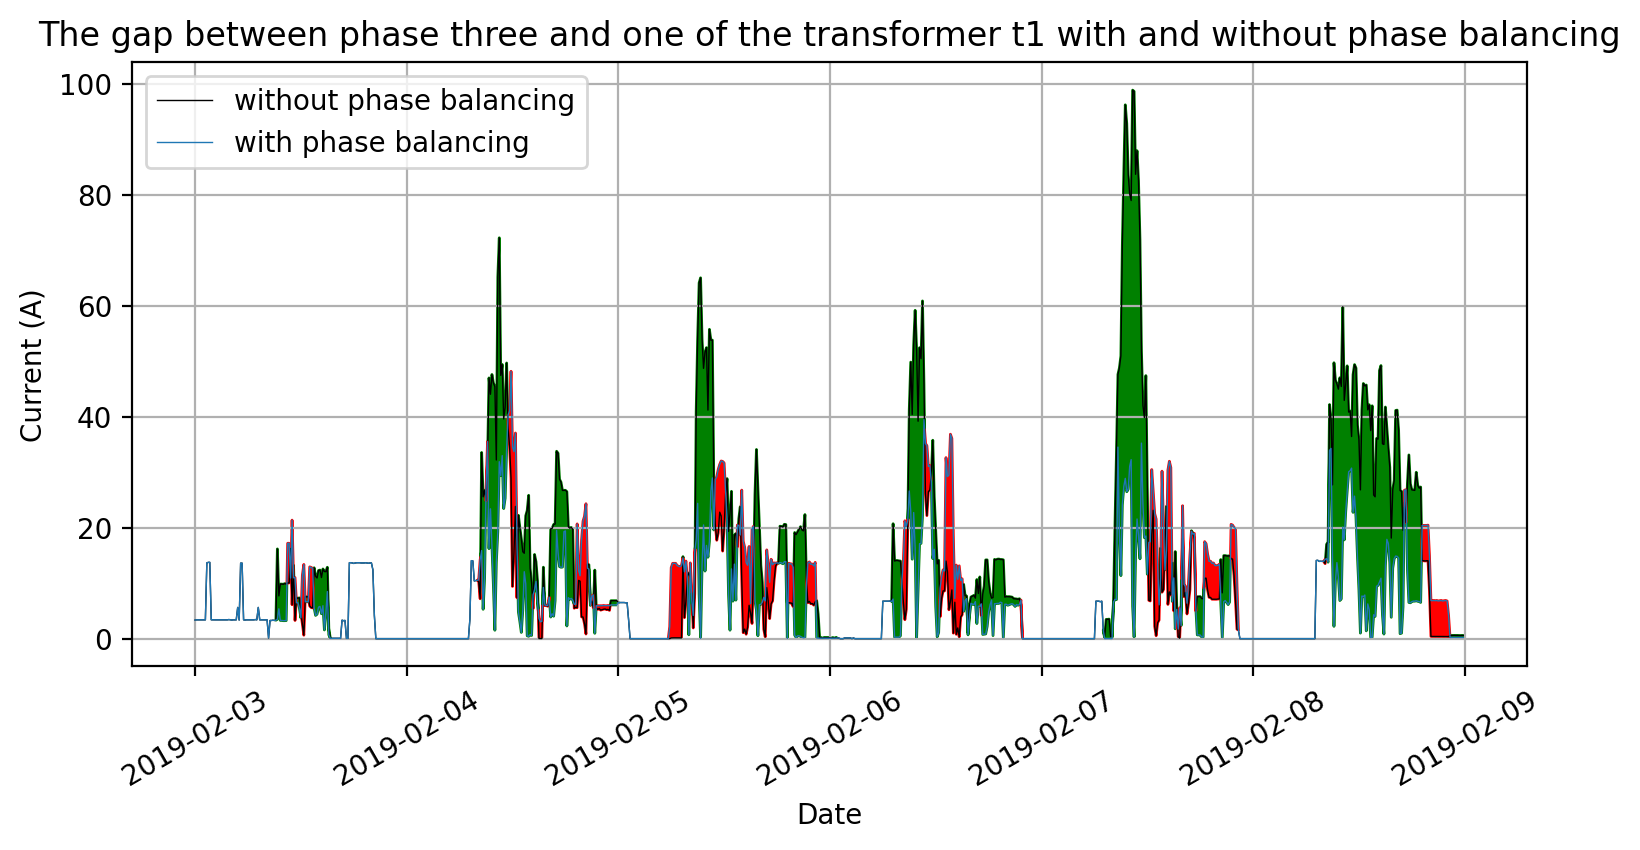

In [22]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase three and one of the transformer t1 with and without phase balancing")
y1 = abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P3 (kW)"][b:e] - result2["P1 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=0.5, label = "without phase balancing")
plt.plot(dates, y2, linewidth=0.5, label = "with phase balancing")
plt.fill_between(dates, y1, y2, where = y1 > y2 ,color='green' ,interpolate=True)
plt.fill_between(dates, y2, y1, where = y2 > y1 ,color='red' ,interpolate=True)
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

### 3.3 One month results

Set the begin and the end simulation point to plot the desired month of the year. We showed the results for "May", but you can change to whatever day you want.

In [111]:
dates = []
d0 = dt.datetime(2019, 1, 1)
begin = input("From (year/month/day/hour/minute):")
end = input("To (year/month/day/hour/minute):")
begindt = dt.datetime.strptime(begin, "%Y/%m/%d/%H/%M")
enddt = dt.datetime.strptime(end, "%Y/%m/%d/%H/%M")
begin_delta = begindt - d0
end_delta = enddt - d0
b = int(begin_delta.total_seconds()/60/10)
e = int(end_delta.total_seconds()/60/10)
dates = [begindt + dt.timedelta(minutes = 10 * i) for i in range(e - b)]

From (year/month/day/hour/minute):2019/05/01/00/00
To (year/month/day/hour/minute):2019/06/01/00/00


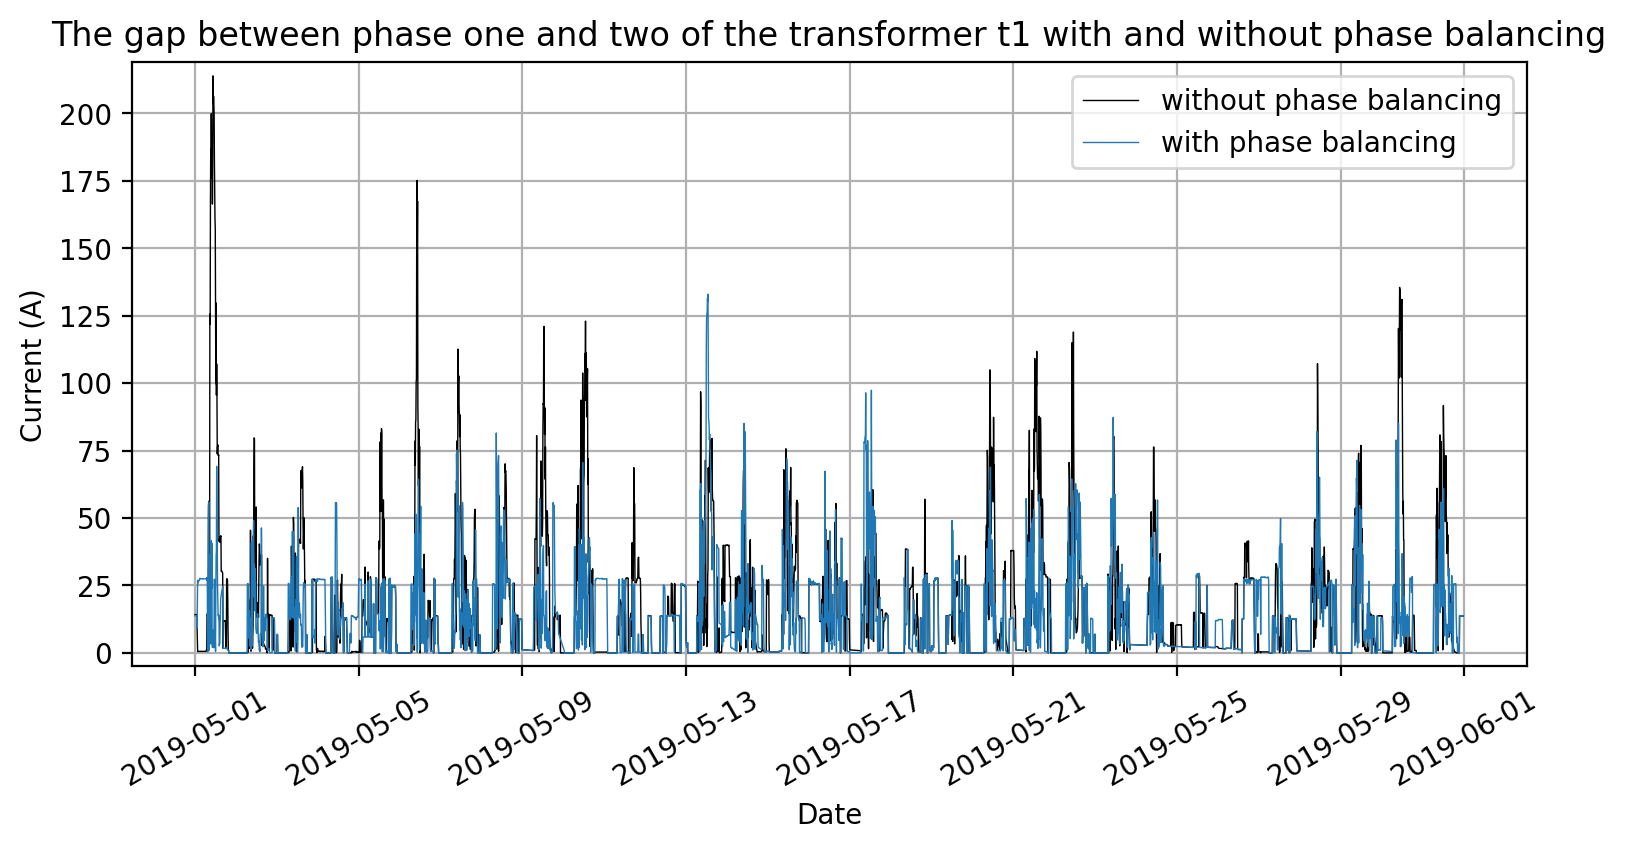

In [113]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase one and two of the transformer t1 with and without phase balancing")
y1 = abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P1 (kW)"][b:e] - result2["P2 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=0.5, label = "without phase balancing")
plt.plot(dates, y2, linewidth=0.5, label = "with phase balancing")
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

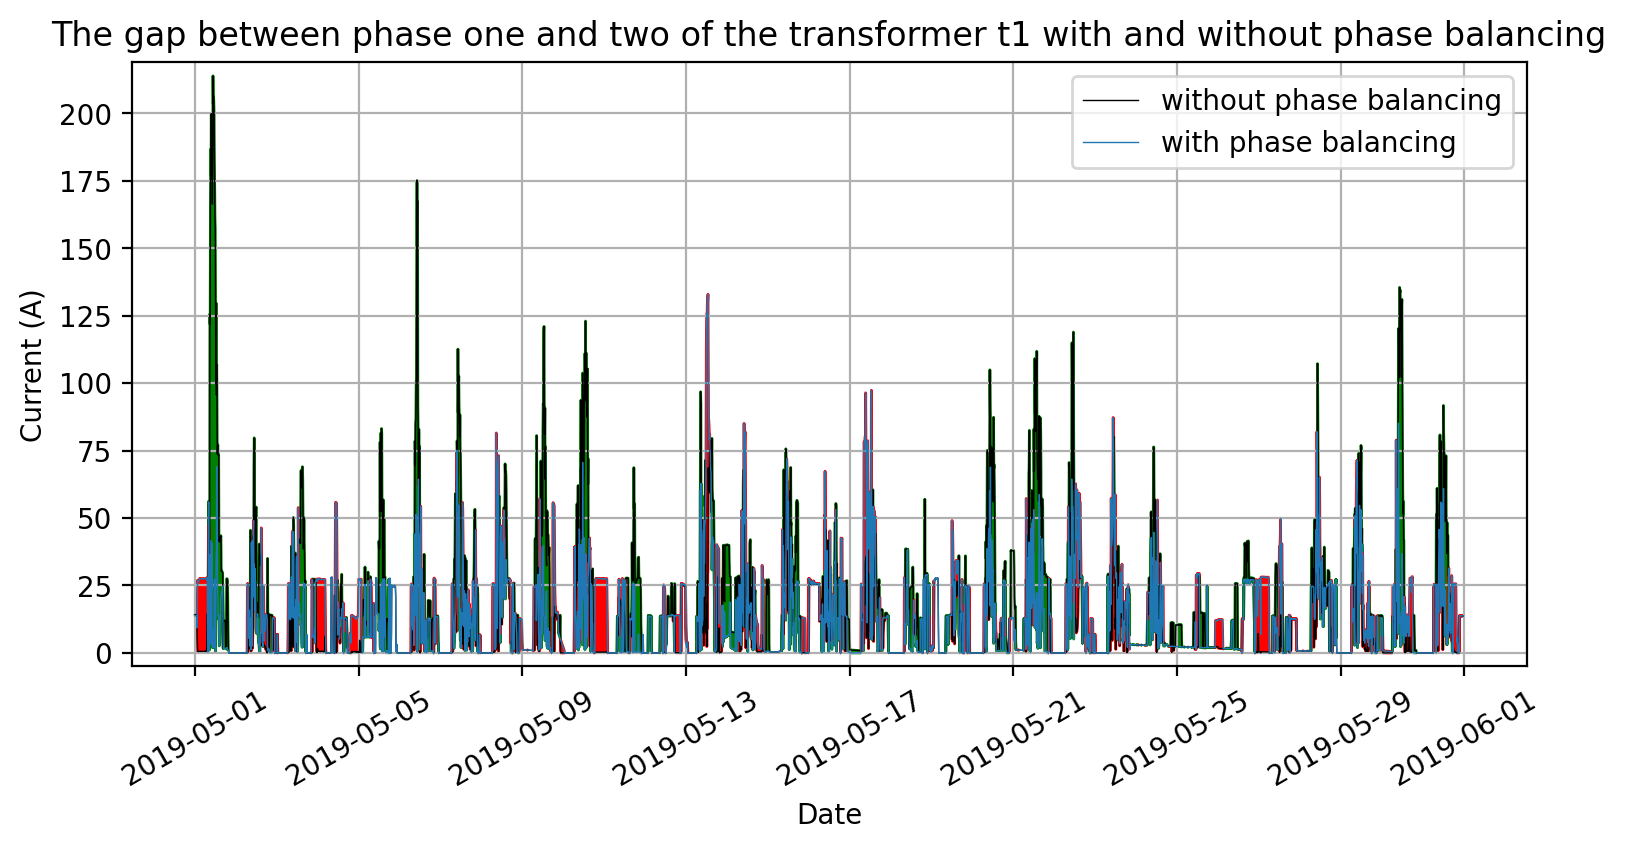

In [114]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase one and two of the transformer t1 with and without phase balancing")
y1 = abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P1 (kW)"][b:e] - result2["P2 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=0.5, label = "without phase balancing")
plt.plot(dates, y2, linewidth=0.5, label = "with phase balancing")
plt.fill_between(dates, y1, y2, where = y1 > y2 ,color='green' ,interpolate=True)
plt.fill_between(dates, y2, y1, where = y2 > y1 ,color='red' ,interpolate=True)
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

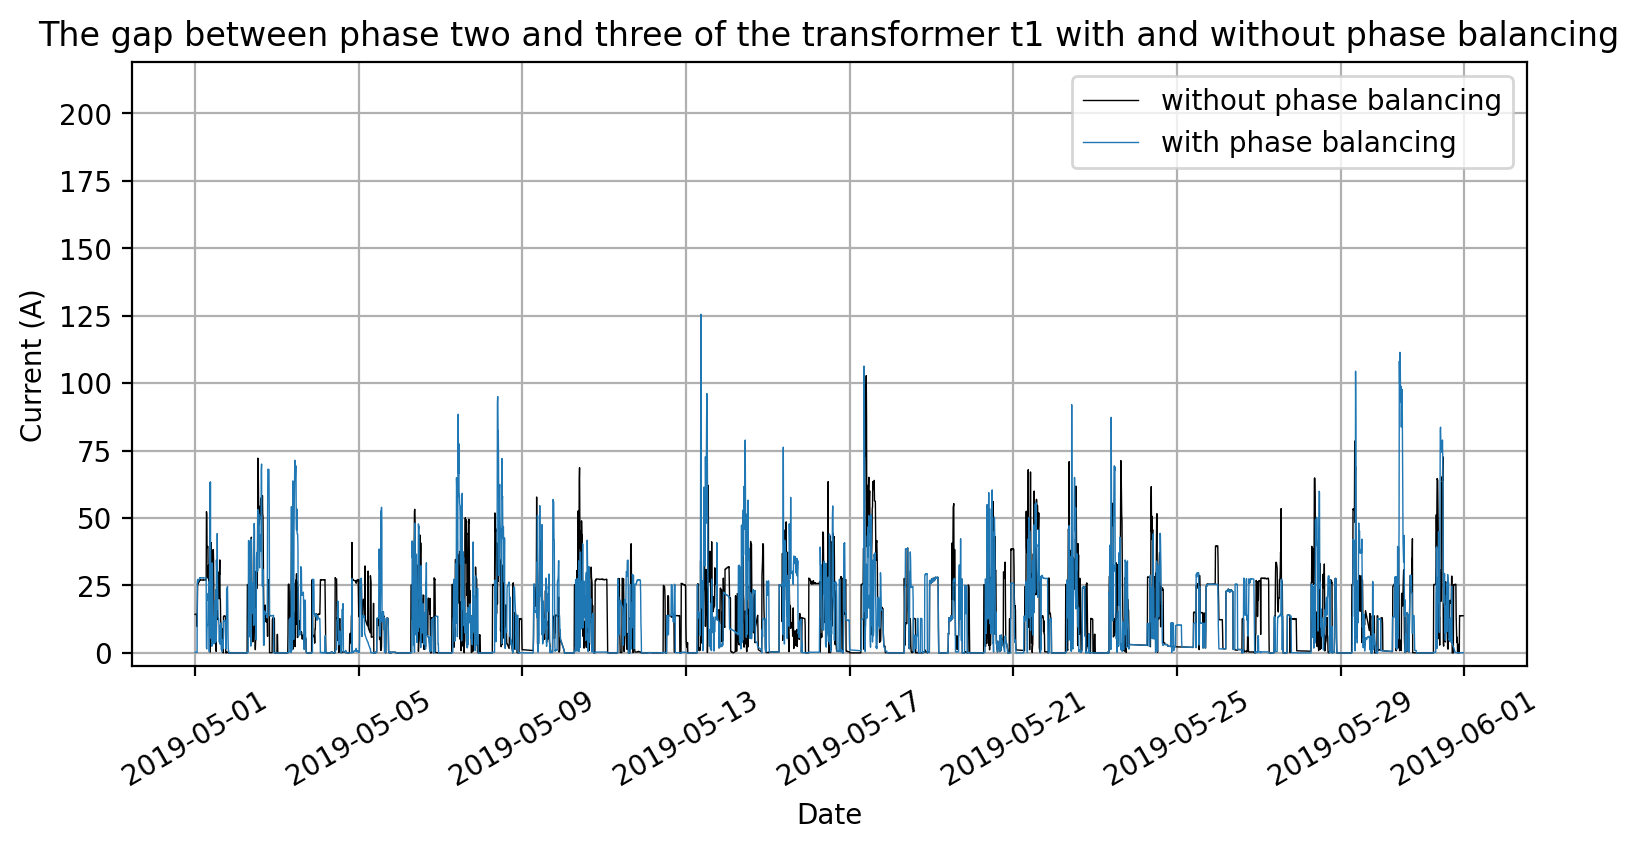

In [115]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase two and three of the transformer t1 with and without phase balancing")
y1 = abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P2 (kW)"][b:e] - result2["P3 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=0.5, label = "without phase balancing")
plt.plot(dates, y2, linewidth=0.5, label = "with phase balancing")
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

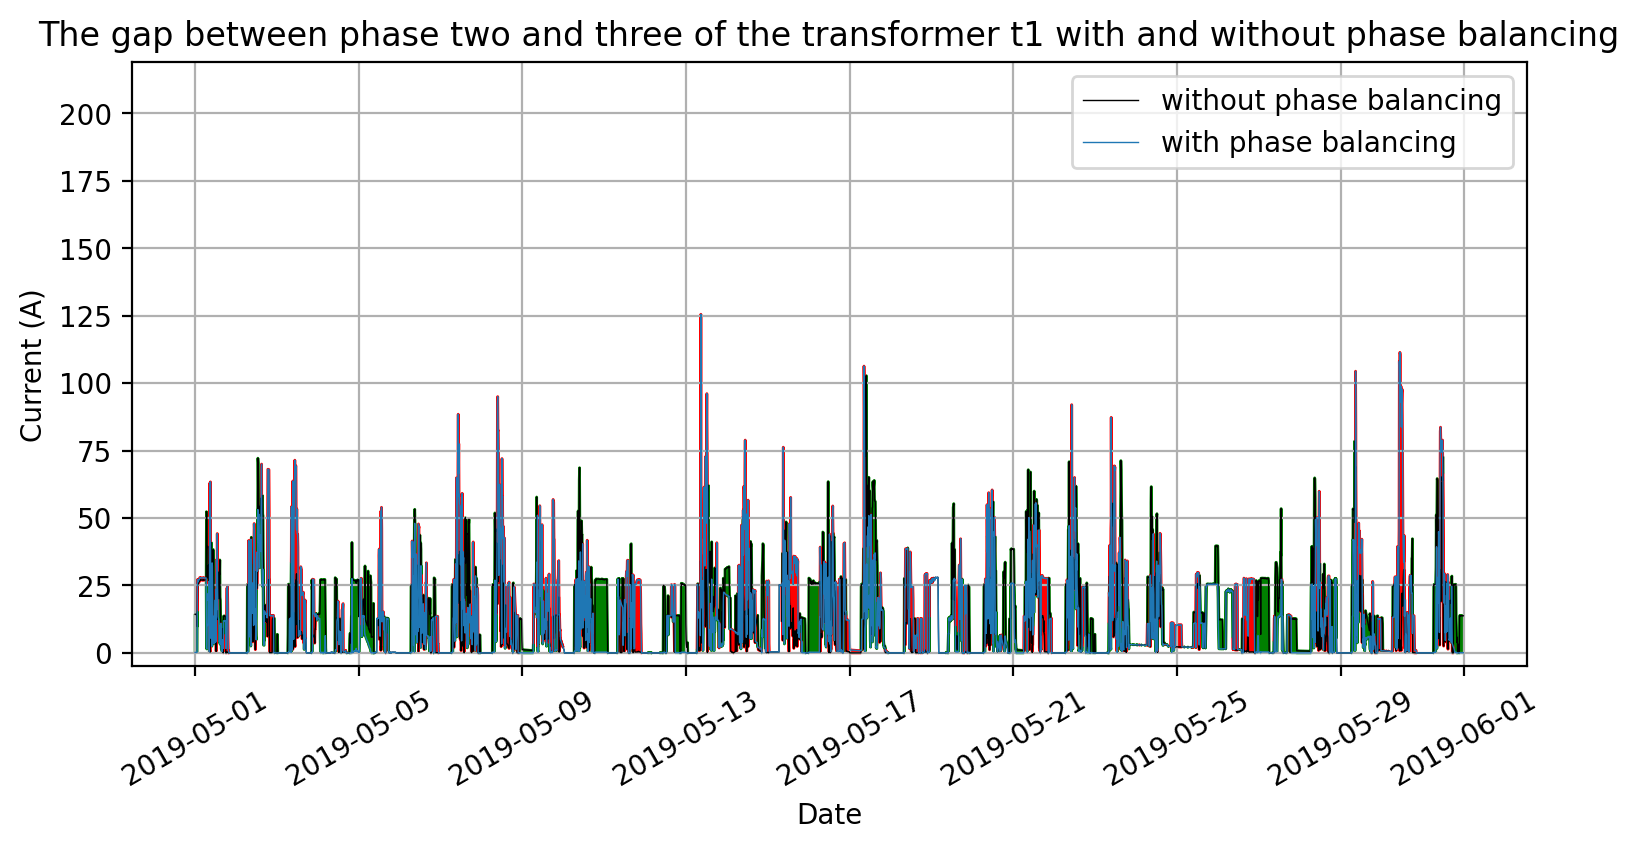

In [116]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase two and three of the transformer t1 with and without phase balancing")
y1 = abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P2 (kW)"][b:e] - result2["P3 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=0.5, label = "without phase balancing")
plt.plot(dates, y2, linewidth=0.5, label = "with phase balancing")
plt.fill_between(dates, y1, y2, where = y1 > y2 ,color='green' ,interpolate=True)
plt.fill_between(dates, y2, y1, where = y2 > y1 ,color='red' ,interpolate=True)
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

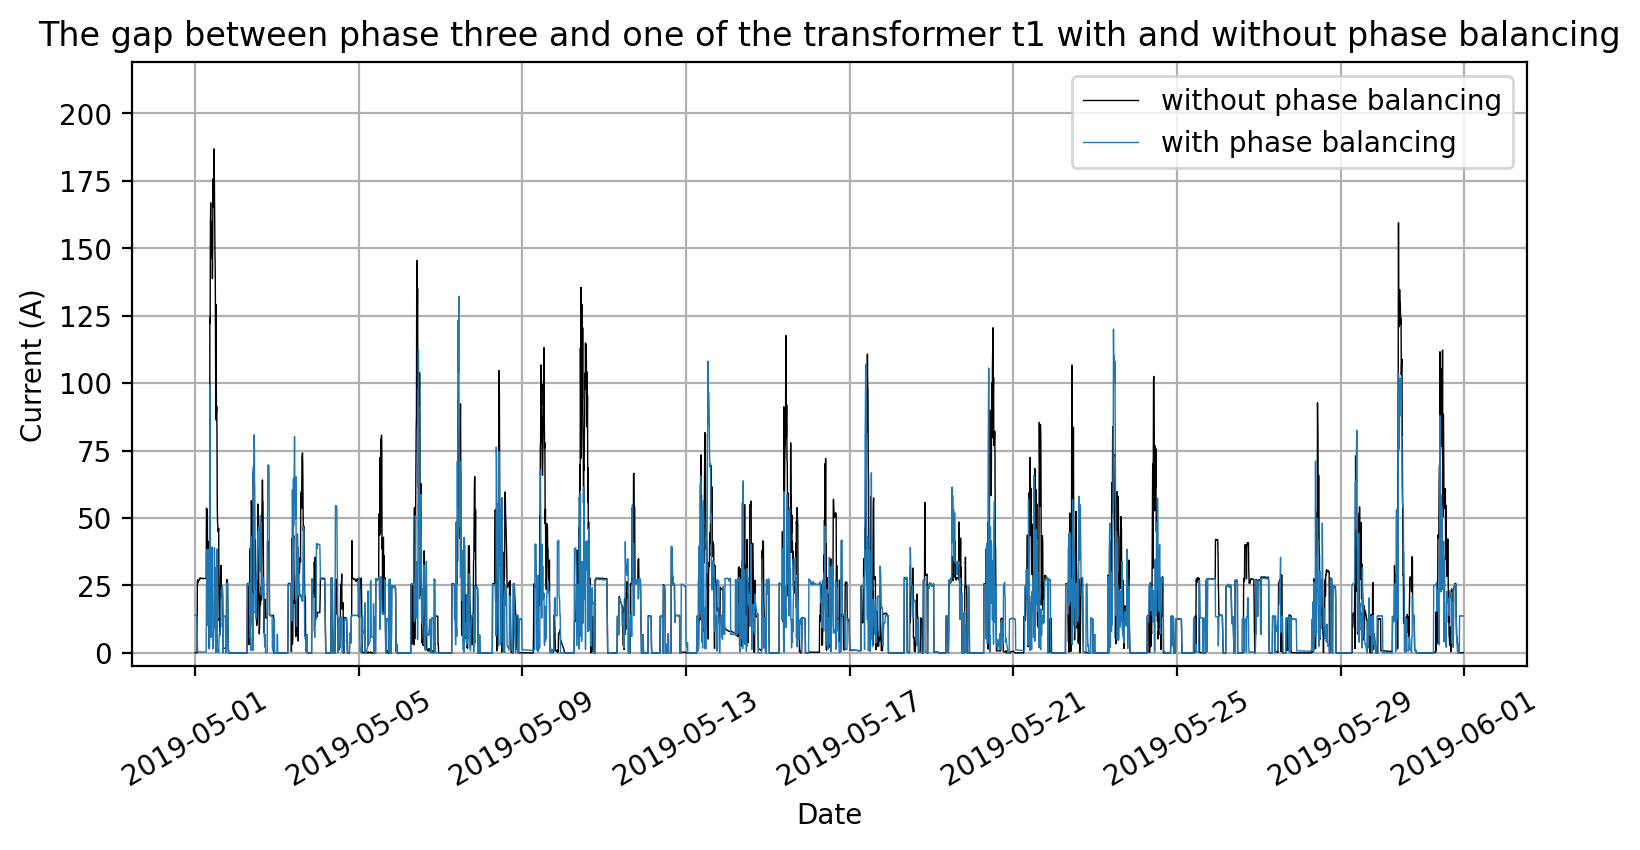

In [117]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase three and one of the transformer t1 with and without phase balancing")
y1 = abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P3 (kW)"][b:e] - result2["P1 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=0.5, label = "without phase balancing")
plt.plot(dates, y2, linewidth=0.5, label = "with phase balancing")
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

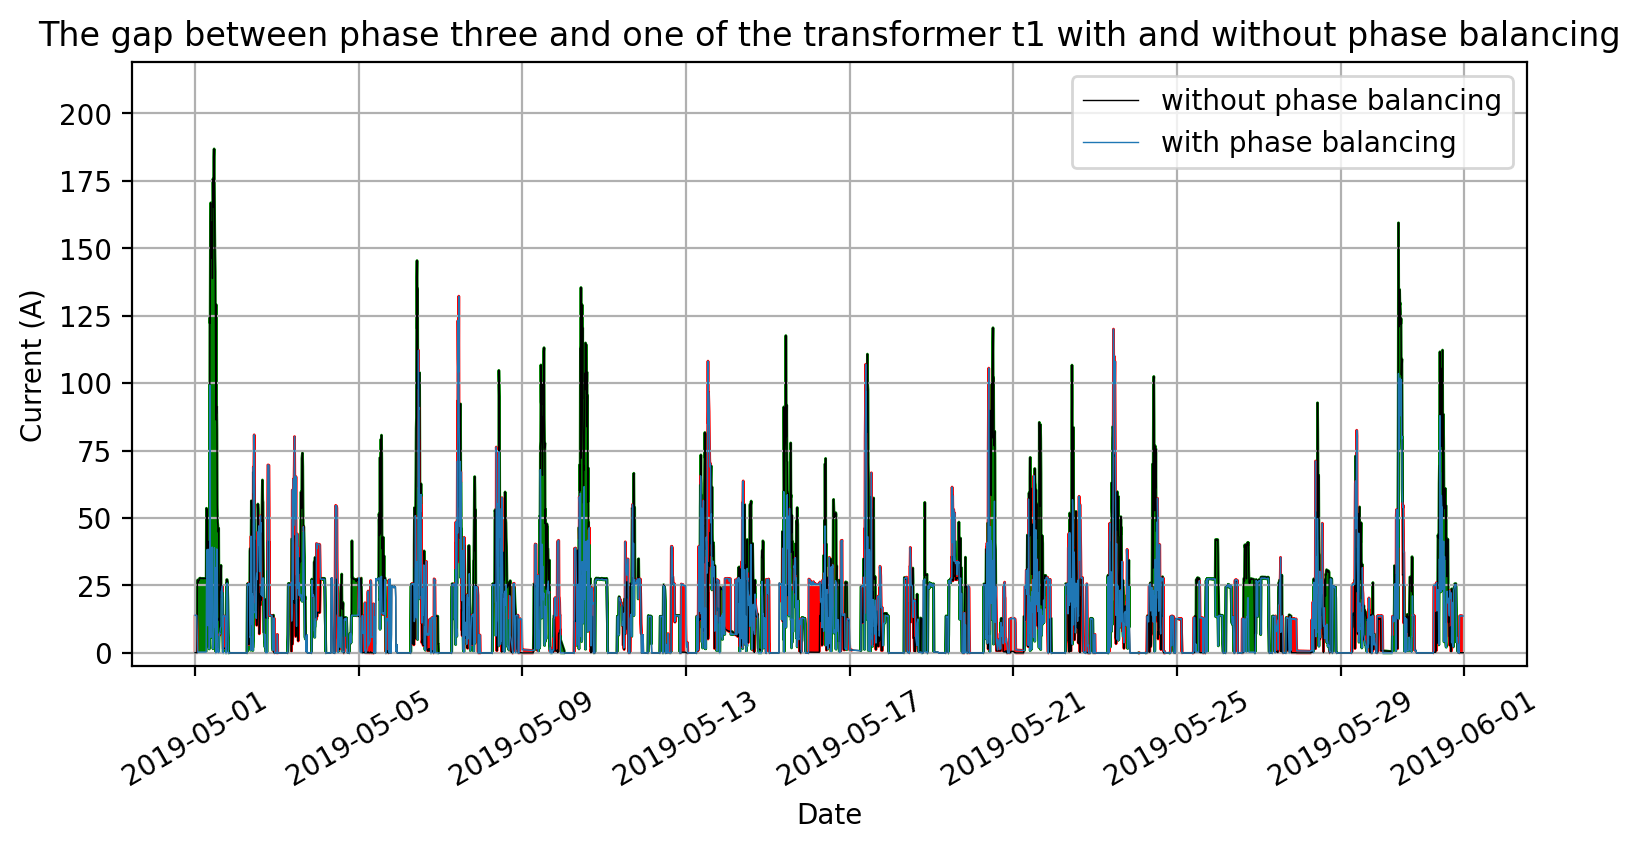

In [118]:
figure(figsize=(9, 4), dpi=200)
plt.title("The gap between phase three and one of the transformer t1 with and without phase balancing")
y1 = abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]) * 1000 / 120
y2 = abs(result2["P3 (kW)"][b:e] - result2["P1 (kW)"][b:e]) * 1000 / 120
plt.plot(dates, y1, 'black', linewidth=0.5, label = "without phase balancing")
plt.plot(dates, y2, linewidth=0.5, label = "with phase balancing")
plt.fill_between(dates, y1, y2, where = y1 > y2 ,color='green' ,interpolate=True)
plt.fill_between(dates, y2, y1, where = y2 > y1 ,color='red' ,interpolate=True)
plt.ylim([-5,max(max(abs(result1["P1 (kW)"][b:e] - result1["P2 (kW)"][b:e])), max(abs(result1["P2 (kW)"][b:e] - result1["P3 (kW)"][b:e])), max(abs(result1["P3 (kW)"][b:e] - result1["P1 (kW)"][b:e]))) * 1000 / 120 + 5])
plt.ylabel("Current (A)")
plt.xlabel("Date")
plt.xticks(rotation=30) 
plt.grid()
plt.legend()

plt.show()

## 4. Further analysis

In section, we calculted some metrics that could help evaluate the performance of the phase balancing using switchers

### 4.1. Maximum violation

This metric shows the maximum gap between the phases of the transformers through the whole year of simulation for the case of phase balancing and for the case without phase balancing

In [19]:
max1_12 = max(abs(result1["P1 (kW)"] - result1["P2 (kW)"]) * 1000 / 120)
max2_12 = max(abs(result2["P1 (kW)"] - result2["P2 (kW)"]) * 1000 / 120)
print("Maximum violation between phase one and two:\nwithout phase balancing :",f"{max1_12:.3}","A \nwith phase balancing:",f"{max2_12:.3}","A")

Maximum violation between phase one and two:
without phase balancing : 1.34e+02 A 
with phase balancing: 55.3 A


In [20]:
max1_23 = max(abs(result1["P2 (kW)"] - result1["P3 (kW)"]) * 1000 / 120)
max2_23 = max(abs(result2["P2 (kW)"] - result2["P3 (kW)"]) * 1000 / 120)
print("Maximum violation between phase two and three:\nwithout phase balancing :",f"{max1_23:.3}","A \nwith phase balancing:",f"{max2_23:.3}","A")

Maximum violation between phase two and three:
without phase balancing : 63.8 A 
with phase balancing: 70.6 A


In [21]:
max1_31 = max(abs(result1["P3 (kW)"] - result1["P1 (kW)"]) * 1000 / 120)
max2_31 = max(abs(result2["P3 (kW)"] - result2["P1 (kW)"]) * 1000 / 120)
print("Maximum violation between phase three and one:\nwithout phase balancing :",f"{max1_31:.3}","A \nwith phase balancing:",f"{max2_31:.3}","A")

Maximum violation between phase three and one:
without phase balancing : 1.13e+02 A 
with phase balancing: 66.1 A


### 4.2. Duration of violation for more than 0 A gap

This metric shows the duration in which the gap is more than 0 A between the phases of the transformers through the whole year of simulation for the case of phase balancing and for the case without phase balancing

In [13]:
d1_12_0 = 0
d1_23_0 = 0
d1_31_0 = 0
d2_12_0 = 0
d2_23_0 = 0
d2_31_0 = 0
for i in range(52560):
    if abs(result1["P1 (kW)"][i] - result1["P2 (kW)"][i]) != 0:
        d1_12_0 += 1
    if abs(result1["P2 (kW)"][i] - result1["P3 (kW)"][i]) != 0:
        d1_23_0 += 1
    if abs(result1["P3 (kW)"][i] - result1["P1 (kW)"][i]) != 0:
        d1_31_0 += 1
    if abs(result2["P1 (kW)"][i] - result2["P2 (kW)"][i]) != 0:
        d2_12_0 += 1
    if abs(result2["P2 (kW)"][i] - result2["P3 (kW)"][i]) != 0:
        d2_23_0 += 1
    if abs(result2["P3 (kW)"][i] - result2["P1 (kW)"][i]) != 0:
        d2_31_0 += 1

In [14]:
print("Duration of violation for more than 0 kW gap between phase one and two: \nwithout phase balancing:",d1_12_0 * 10,"minutes \nwith phases balancing:",d2_12_0 * 10,"minutes")

Duration of violation for more than 0 kW gap between phase one and two: 
without phase balancing: 331450 minutes 
with phases balancing: 329770 minutes


In [15]:
print("Duration of violation for more than 0 kW gap between phase two and three: \nwithout phase balancing:",d1_23_0 * 10,"minutes \nwith phases balancing:",d2_23_0 * 10,"minutes")

Duration of violation for more than 0 kW gap between phase two and three: 
without phase balancing: 321940 minutes 
with phases balancing: 325960 minutes


In [16]:
print("Duration of violation for more than 0 kW gap between phase three and one: \nwithout phase balancing:",d1_31_0 * 10,"minutes \nwith phases balancing:",d2_31_0 * 10,"minutes")

Duration of violation for more than 0 kW gap between phase three and one: 
without phase balancing: 332160 minutes 
with phases balancing: 329750 minutes


In [17]:
print("Total duration of violation for more than 0 kW gap: \nwithout phase balancing:",d1_12_0 * 10 + d1_23_0 * 10 + d1_31_0 * 10,"minutes \nwith phases balancing:",d2_12_0 * 10 + d2_23_0 * 10 + d2_31_0 * 10,"minutes")

Total duration of violation for more than 0 kW gap: 
without phase balancing: 985550 minutes 
with phases balancing: 985480 minutes


### 4.3. Duration of violation for more than 1 kW gap

This metric shows the duration in which the gap is more than 1 kW between the phases of the transformers through the whole year of simulation for the case of phase balancing and for the case without phase balancing

In [18]:
d1_12_1 = 0
d1_23_1 = 0
d1_31_1 = 0
d2_12_1 = 0
d2_23_1 = 0
d2_31_1 = 0
for i in range(52560):
    if abs(result1["P1 (kW)"][i] - result1["P2 (kW)"][i]) > 1:
        d1_12_1 += 1
    if abs(result1["P2 (kW)"][i] - result1["P3 (kW)"][i]) > 1:
        d1_23_1 += 1
    if abs(result1["P3 (kW)"][i] - result1["P1 (kW)"][i]) > 1:
        d1_31_1 += 1
    if abs(result2["P1 (kW)"][i] - result2["P2 (kW)"][i]) > 1:
        d2_12_1 += 1
    if abs(result2["P2 (kW)"][i] - result2["P3 (kW)"][i]) > 1:
        d2_23_1 += 1
    if abs(result2["P3 (kW)"][i] - result2["P1 (kW)"][i]) > 1:
        d2_31_1 += 1

In [24]:
print("Duration of violation for more than 1 kW gap between phase one and two: \nwithout phase balancing:",d1_12_1 * 10,"minutes \nwith phases balancing:",d2_12_1 * 10,"minutes")

Duration of violation for more than 1 kW gap between phase one and two: 
without phase balancing: 180740 minutes 
with phases balancing: 144210 minutes


In [25]:
print("Duration of violation for more than 1 kW gap between phase two and three: \nwithout phase balancing:",d1_23_1 * 10,"minutes \nwith phases balancing:",d2_23_1 * 10,"minutes")

Duration of violation for more than 1 kW gap between phase two and three: 
without phase balancing: 147690 minutes 
with phases balancing: 126810 minutes


In [26]:
print("Duration of violation for more than 1 kW gap between phase three and one: \nwithout phase balancing:",d1_31_1 * 10,"minutes \nwith phases balancing:",d2_31_1 * 10,"minutes")

Duration of violation for more than 1 kW gap between phase three and one: 
without phase balancing: 166340 minutes 
with phases balancing: 150400 minutes


In [27]:
print("Total duration of violation for more than 1 kW gap: \nwithout phase balancing:",d1_12_1 * 10 + d1_23_1 * 10 + d1_31_1 * 10,"minutes \nwith phases balancing:",d2_12_1 * 10 + d2_23_1 * 10 + d2_31_1 * 10,"minutes")

Total duration of violation for more than 1 kW gap: 
without phase balancing: 494770 minutes 
with phases balancing: 421420 minutes


### 4.4. Duration of violation for more than 2 kW gap

This metric shows the duration in which the gap is more than 2 kW between the phases of the transformers through the whole year of simulation for the case of phase balancing and for the case without phase balancing

In [28]:
d1_12_2 = 0
d1_23_2 = 0
d1_31_2 = 0
d2_12_2 = 0
d2_23_2 = 0
d2_31_2 = 0
for i in range(52560):
    if abs(result1["P1 (kW)"][i] - result1["P2 (kW)"][i]) > 2:
        d1_12_2 += 1
    if abs(result1["P2 (kW)"][i] - result1["P3 (kW)"][i]) > 2:
        d1_23_2 += 1
    if abs(result1["P3 (kW)"][i] - result1["P1 (kW)"][i]) > 2:
        d1_31_2 += 1
    if abs(result2["P1 (kW)"][i] - result2["P2 (kW)"][i]) > 2:
        d2_12_2 += 1
    if abs(result2["P2 (kW)"][i] - result2["P3 (kW)"][i]) > 2:
        d2_23_2 += 1
    if abs(result2["P3 (kW)"][i] - result2["P1 (kW)"][i]) > 2:
        d2_31_2 += 1

In [29]:
print("Duration of violation for more than 2 kW gap between phase one and tow: \nwithout phase balancing:",d1_12_2 * 10,"minutes \nwith phases balancing:",d2_12_2 * 10,"minutes")

Duration of violation for more than 2 kW gap between phase one and tow: 
without phase balancing: 86440 minutes 
with phases balancing: 33270 minutes


In [31]:
print("Duration of violation for more than 2 kW gap between phase two and three: \nwithout phase balancing:",d1_23_2 * 10,"minutes \nwith phases balancing:",d2_23_2 * 10,"minutes")

Duration of violation for more than 2 kW gap between phase two and three: 
without phase balancing: 44990 minutes 
with phases balancing: 35170 minutes


In [32]:
print("Duration of violation for more than 2 kW gap between phase three and one: \nwithout phase balancing:",d1_31_2 * 10,"minutes \nwith phases balancing:",d2_31_2 * 10,"minutes")

Duration of violation for more than 2 kW gap between phase three and one: 
without phase balancing: 78710 minutes 
with phases balancing: 32160 minutes


In [33]:
print("Total duration of violation for more than 2 kW gap: \nwithout phase balancing:",d1_12_2 * 10 + d1_23_2 * 10 + d1_31_2 * 10,"minutes \nwith phases balancing:",d2_12_2 * 10 + d2_23_2 * 10 + d2_31_2 * 10,"minutes")

Total duration of violation for more than 2 kW gap: 
without phase balancing: 210140 minutes 
with phases balancing: 100600 minutes


## 5. Conclusion

Based on the analysis above, the switchers are unable to reduce the high values of gaps between phases. However it can reduce the duration in which the transformer is facing phases unbalance.